# Mapping Metro Stations with Walking Buffer

In [4]:
#first import geopandas to work with the shapefiles

In [5]:
import pandas as pd
import geopandas as gpd

In [6]:
#import the Data 
metro = gpd.read_file('Metro Stations.zip')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [7]:
#check to see if data imported 

In [8]:
metro.head(201)


,LINE,LINENUM,LINENUM2,STNSEQ,STNSEQ2,DIR,STOPNUM,STATION,LAT,LONG,TPIS_NAME,POINT_X,POINT_Y,geometry
0,Blue,801,0,21,0,None,80101,Downtown Long Beach Station,33.768071,-118.192921,Long Bch,6.503030e+06,1.738034e+06,POINT (-118.19292 33.76807)
1,Blue,801,0,22,0,North,80102,Pacific Ave Station,33.772258,-118.193700,Pacific,6.502796e+06,1.739558e+06,POINT (-118.19370 33.77226)
2,Blue,801,0,18,0,None,80105,Anaheim Street Station,33.781830,-118.189384,Anaheim,6.504115e+06,1.743039e+06,POINT (-118.18938 33.78183)
3,Blue,801,0,17,0,None,80106,Pacific Coast Hwy Station,33.789090,-118.189382,PCH,6.504120e+06,1.745681e+06,POINT (-118.18938 33.78909)
4,Blue,801,0,16,0,None,80107,Willow Street Station,33.807079,-118.189834,Willow,6.503995e+06,1.752228e+06,POINT (-118.18983 33.80708)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Gold,804,0,5,0,None,80423,Monrovia Station,34.133155,-118.003473,Monrovia,6.560616e+06,1.870840e+06,POINT (-118.00347 34.13316)
92,Gold,804,0,4,0,None,80424,Duarte / City of Hope Station,34.132518,-117.967680,Duarte,6.571447e+06,1.870610e+06,POINT (-117.96768 34.13252)
93,Gold,804,0,3,0,None,80425,Irwindale Station,34.129048,-117.932506,Irwindale,6.582093e+06,1.869352e+06,POINT (-117.93251 34.12905)
94,Gold,804,0,2,0,None,80426,Azusa Downtown Station,34.135863,-117.906631,Azusa,6.589921e+06,1.871838e+06,POINT (-117.90663 34.13586)


In [9]:
#data types
metro.dtypes

LINE           object
LINENUM         int64
LINENUM2        int64
STNSEQ          int64
STNSEQ2         int64
DIR            object
STOPNUM         int64
STATION        object
LAT           float64
LONG          float64
TPIS_NAME      object
POINT_X       float64
POINT_Y       float64
geometry     geometry
dtype: object

<AxesSubplot: >

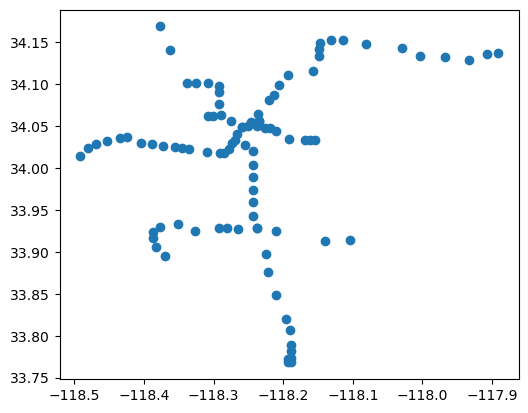

In [10]:
#map metro stops
metro.plot()

In [11]:
#trim columns
desired_columns = ['LINE','LINENUM','STATION','LAT','LONG','geometry']


In [12]:
# check to see if columns have been trimmed
metro[desired_columns].sample(1)

,LINE,LINENUM,STATION,LAT,LONG,geometry
33,Red,802,Universal / Studio City Station,34.140002,-118.362699,POINT (-118.36270 34.14000)


In [13]:
metro_trimmed = metro[desired_columns].copy()
metro_trimmed

,LINE,LINENUM,STATION,LAT,LONG,geometry
0,Blue,801,Downtown Long Beach Station,33.768071,-118.192921,POINT (-118.19292 33.76807)
1,Blue,801,Pacific Ave Station,33.772258,-118.193700,POINT (-118.19370 33.77226)
2,Blue,801,Anaheim Street Station,33.781830,-118.189384,POINT (-118.18938 33.78183)
3,Blue,801,Pacific Coast Hwy Station,33.789090,-118.189382,POINT (-118.18938 33.78909)
4,Blue,801,Willow Street Station,33.807079,-118.189834,POINT (-118.18983 33.80708)
...,...,...,...,...,...,...
91,Gold,804,Monrovia Station,34.133155,-118.003473,POINT (-118.00347 34.13316)
92,Gold,804,Duarte / City of Hope Station,34.132518,-117.967680,POINT (-117.96768 34.13252)
93,Gold,804,Irwindale Station,34.129048,-117.932506,POINT (-117.93251 34.12905)
94,Gold,804,Azusa Downtown Station,34.135863,-117.906631,POINT (-117.90663 34.13586)


In [14]:
#now to overlay city boundaries. We will only be looking at data within the city of LA. 

In [15]:
municipalities=gpd.read_file('City_Boundaries.geojson')
municipalities.head()

,OBJECTID,CITY_NAME,CITY_LABEL,ABBR,OF_AREA_SM,CITY_TYPE,FEAT_TYPE,COLOR_EGIS,URL,PHONE,last_edited_date,ShapeSTArea,ShapeSTLength,geometry
0,3,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,2.483437e+05,7484.640344,"POLYGON ((-118.39951 33.84377, -118.39952 33.8..."
1,4,Long Beach,Long Beach,LB,50.309,City,Water,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,4.000260e+06,20369.924519,"POLYGON ((-118.21061 33.72181, -118.21064 33.7..."
2,5,Redondo Beach,Redondo Beach,RBCH,6.349,City,Breakwater,"Pink - RGB 255,190,232",www.redondo.org,3103721171,2022-07-20 00:08:28+00:00,9.452611e+03,701.117043,"POLYGON ((-118.39150 33.83193, -118.39160 33.8..."
3,6,Los Angeles,Los Angeles,LA,468.852,City,Breakwater,"Gray - RGB 178,178,178",www.lacity.org,2134733231,2022-07-20 00:08:28+00:00,2.857692e+05,17391.983014,"POLYGON ((-118.26566 33.70405, -118.26574 33.7..."
4,7,Long Beach,Long Beach,LB,50.309,City,Breakwater,"Purple - RGB 185,185,250",www.longbeach.gov,5625706555,2022-07-20 00:08:28+00:00,1.097324e+05,5448.776853,"POLYGON ((-118.11850 33.74278, -118.11855 33.7..."


In [16]:
#First, plot the city map and the metro map
lacity=municipalities.query("CITY_NAME == 'Los Angeles'").copy()


<AxesSubplot: >

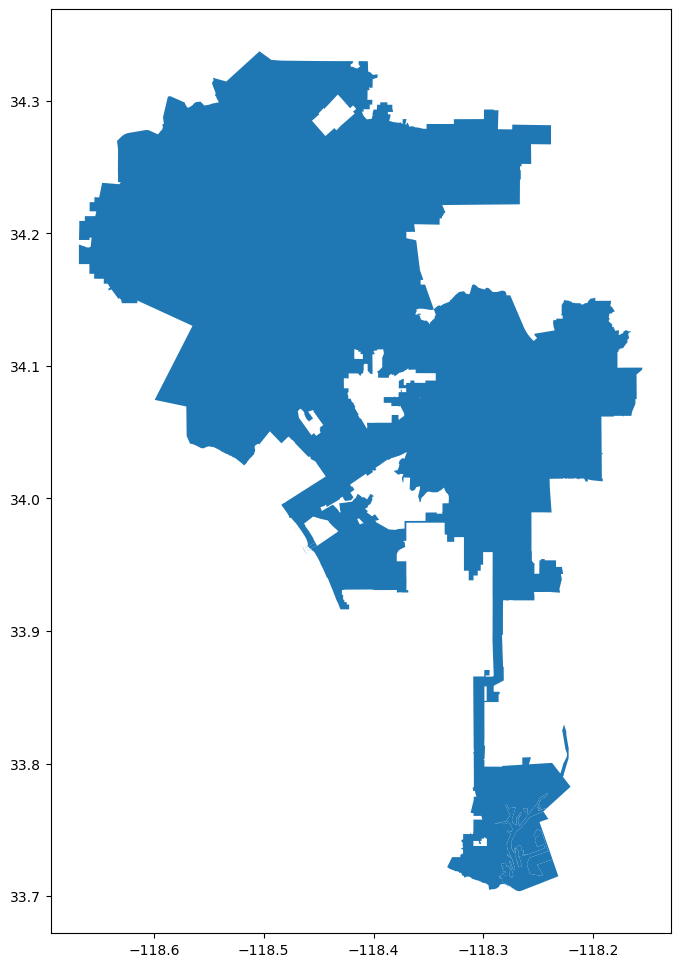

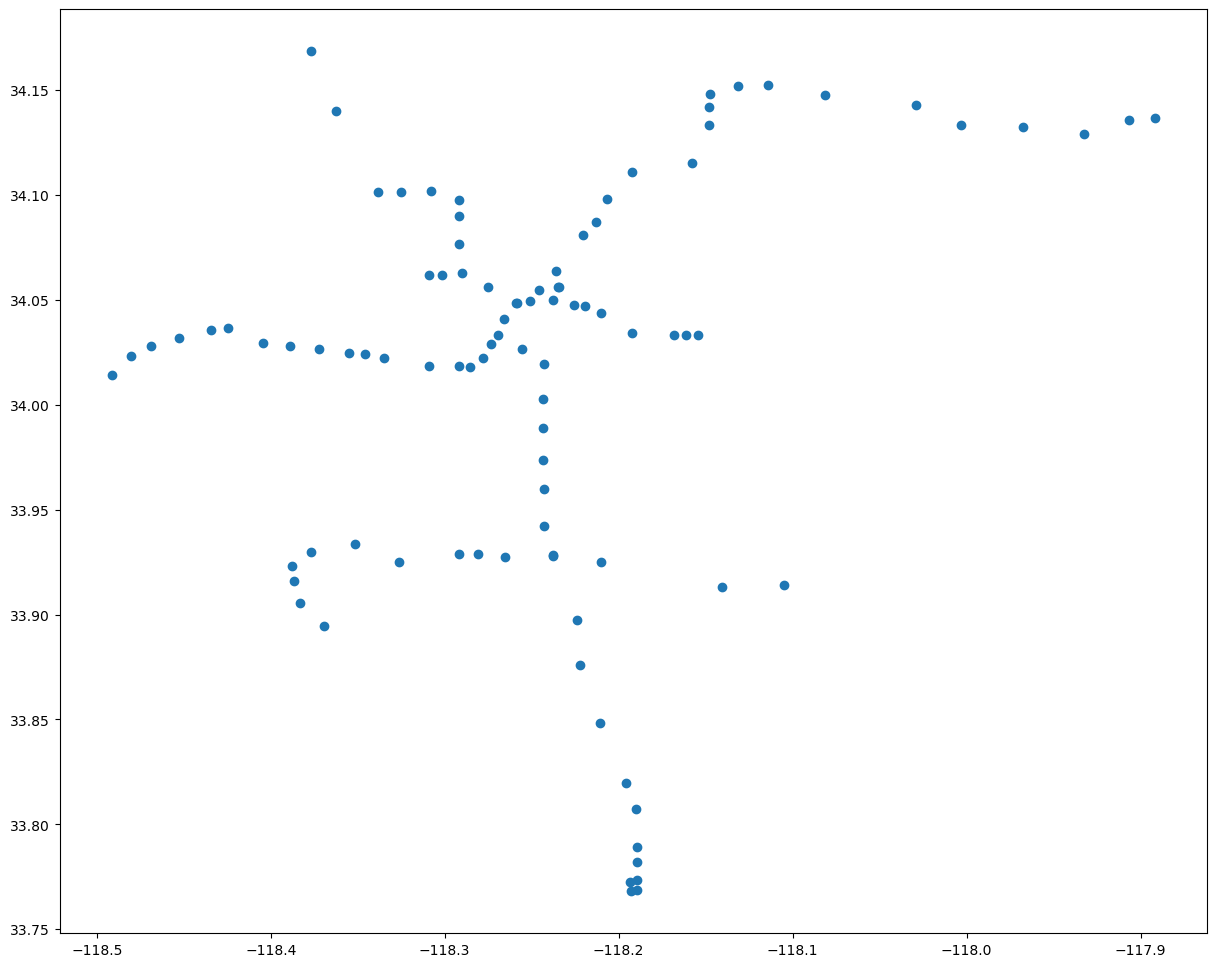

In [17]:
lacity.plot(figsize=(15,12))
metro.plot(figsize=(15,12))

### LA Metro Stops

<AxesSubplot: >

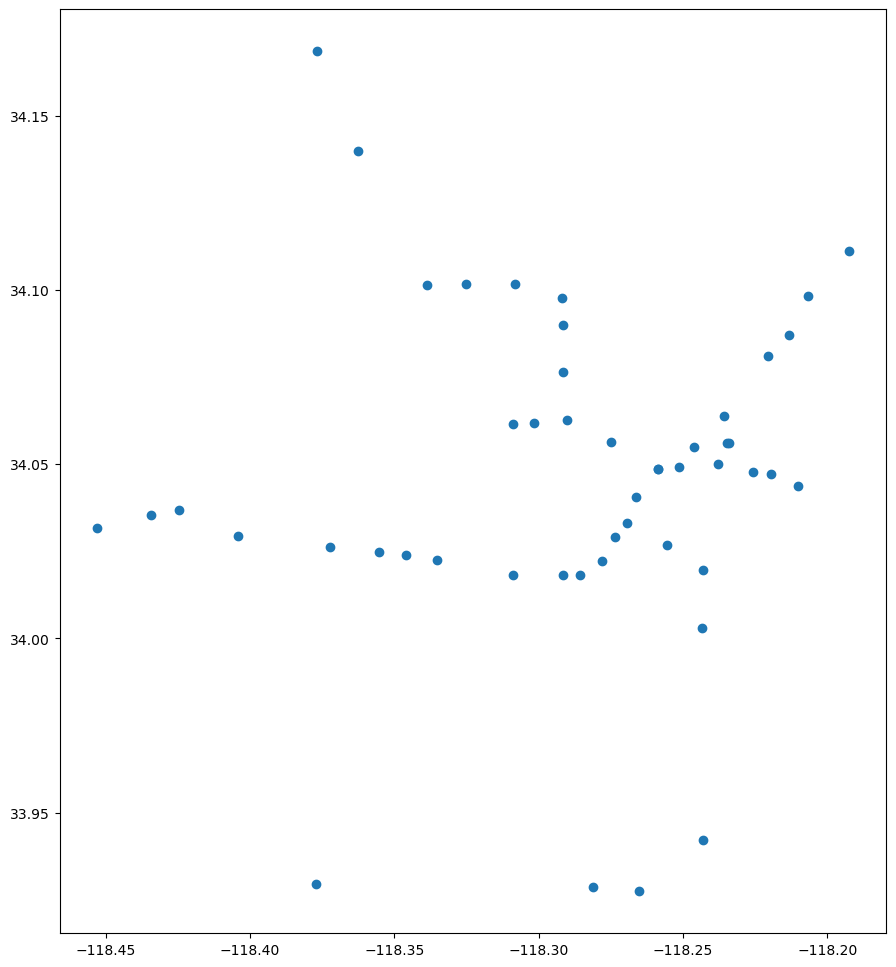

In [18]:
#now, we create a clipping mask by overlaying the data
citymetro = gpd.clip(metro, lacity)
citymetro.plot(figsize=(15,12))


In [39]:
#now we just have the metro stops within the city. Next, we will add a .25 mile buffer zone around the stations. 
#This will help to create walksheds around the stations. 
#NOTE: STILL A WORK IN PROGRESS. NEED TO LEARN HOW TO DO BUFFER IN PYTHON


## Buffer Zones